In [1]:
import sys
import nltk
import sklearn
import pandas
import numpy

import pandas as pd
import numpy as np
df = pd.read_csv('Negf.csv')
print (df.head(5))

  App_name   Category                               User_Review Sentiments  \
0  brainly  Education  Not working properly plz fix the problem   Negative   
1  brainly  Education         App is not good, stuck in between   Negative   
2  brainly  Education                      not working properly   Negative   
3  brainly  Education                        app is not working   Negative   
4  brainly  Education   this app will be not started some issue   Negative   

  Review_Type  
0          AC  
1          AC  
2          AC  
3          AC  
4          AC  


In [2]:
classes = df['Review_Type']
print(classes.value_counts())

PI    2403
BR    2201
AC    1129
FI     937
CI     873
VU     777
AI     363
FR     223
UI     206
Name: Review_Type, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform (classes)
print(classes[:8])
print(Y[:8])
priority = df['Review_Type']
print(priority[:10])

0    AC
1    AC
2    AC
3    AC
4    AC
5    AC
6    AC
7    AC
Name: Review_Type, dtype: object
[0 0 0 0 0 0 0 0]
0    AC
1    AC
2    AC
3    AC
4    AC
5    AC
6    AC
7    AC
8    AC
9    AC
Name: Review_Type, dtype: object


In [4]:
 #Categorical boolean mask
categorical_feature_mask = df.dtypes == object

In [5]:
categorical_feature_mask


App_name       True
Category       True
User_Review    True
Sentiments     True
Review_Type    True
dtype: bool

In [6]:
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

['App_name', 'Category', 'User_Review', 'Sentiments', 'Review_Type']

In [7]:
pri_col = []
for i in categorical_cols:
    if i != 'Review_Type':
        pri_col.append(i)
print(pri_col)

['App_name', 'Category', 'User_Review', 'Sentiments']


In [8]:
le = LabelEncoder()
df[pri_col] = df[pri_col].apply(lambda col: le.fit_transform(col))
df[pri_col].head(10)


,App_name,Category,User_Review,Sentiments
0,19,0,2755,0
1,19,0,261,0
2,19,0,5335,0
3,19,0,4958,0
4,19,0,5478,0
5,19,0,5391,0
6,19,0,4964,0
7,19,0,2308,0
8,19,0,5335,0
9,19,0,12,0


In [10]:
df.Review_Type.value_counts()


PI    2403
BR    2201
AC    1129
FI     937
CI     873
VU     777
AI     363
FR     223
UI     206
Name: Review_Type, dtype: int64

In [11]:
classes = df['Review_Type']
print(classes.value_counts())

In [12]:
print(X.shape)


(9112, 4)


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [14]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
predictions = text_classifier.predict(X_test)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[206   0   6   2   0   1  11   0   1]
 [  0  64   2   0   3   0   0   3   0]
 [  2  10 362  11  37   4   3  10   4]
 [  8   0   3 149   1   0   2   0   3]
 [  0   1  37   2 129   0  31   1   0]
 [  1   2   6   1   0  32   0   0   1]
 [ 11   1   7   2  20   0 438   0   5]
 [  2   1   3   3   0   1   0  29   1]
 [  5   2   2   6  10   2   6   2 112]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       227
           1       0.79      0.89      0.84        72
           2       0.85      0.82      0.83       443
           3       0.85      0.90      0.87       166
           4       0.65      0.64      0.64       201
           5       0.80      0.74      0.77        43
           6       0.89      0.90      0.90       484
           7       0.64      0.72      0.68        40
           8       0.88      0.76      0.82       147

    accuracy                           0.83      1823
   macro avg       0.80      0.81      0.80      182

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [18]:
print(confusion_matrix(y_test,y_pred))  
print(metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,zero_division=1))  

[[114   0   2  25   0   0  86   0   0]
 [ 39   0   0  10   0   0  23   0   0]
 [ 98   0 169  31   0   0 145   0   0]
 [ 43   0   4  67   0   0  52   0   0]
 [ 13   0  59  17  12   0 100   0   0]
 [ 23   0   0  12   0   0   8   0   0]
 [ 70   0  62  11   0   0 341   0   0]
 [ 16   0   0   0   0   0  24   0   0]
 [ 32   0   4  25   0   0  86   0   0]]
0.4965773102131854
0.4621959237343853
0.3988497436404982
0.3856280855732309
              precision    recall  f1-score   support

           0       0.25      0.50      0.34       227
           1       1.00      0.00      0.00        72
           2       0.56      0.38      0.45       443
           3       0.34      0.40      0.37       166
           4       1.00      0.06      0.11       201
           5       1.00      0.00      0.00        43
           6       0.39      0.70      0.51       484
           7       1.00      0.00      0.00        40
           8       1.00      0.00      0.00       147

    accuracy                  

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(solver='liblinear', random_state=0)
#fit the model
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_test))  
print(metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred_test,zero_division=1))  

[[ 12   0  40  24   0   0 151   0   0]
 [ 35   0   2  10   0   0  25   0   0]
 [101   0  31  20   0   0 291   0   0]
 [ 13   0  13  60   0   0  80   0   0]
 [  2   0  19  17  12   0 151   0   0]
 [ 12   0   5  10   0   0  16   0   0]
 [ 26   0  50  11   0   0 397   0   0]
 [  5   0   5   0   0   0  30   0   0]
 [ 31   0  19  15   0   0  82   0   0]]
0.4965773102131854
0.4621959237343853
0.3988497436404982
0.3856280855732309
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       227
           1       1.00      0.00      0.00        72
           2       0.17      0.07      0.10       443
           3       0.36      0.36      0.36       166
           4       1.00      0.06      0.11       201
           5       1.00      0.00      0.00        43
           6       0.32      0.82      0.47       484
           7       1.00      0.00      0.00        40
           8       1.00      0.00      0.00       147

    accuracy                  

In [21]:
    from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.832144816236972


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,dtree_predictions))  
print(classification_report(y_test,dtree_predictions))  
print(accuracy_score(y_test, dtree_predictions))


[[206   0   6   2   0   1  11   0   1]
 [  0  64   2   0   3   0   0   3   0]
 [  2  10 361  13  37   4   3   9   4]
 [  8   0   2 150   1   0   2   0   3]
 [  0   0  37   2 131   0  30   1   0]
 [  1   2   6   1   0  32   0   0   1]
 [ 11   1   7   2  25   0 433   0   5]
 [  2   1   5   2   0   1   0  28   1]
 [  5   1   3   6  11   2   5   2 112]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       227
           1       0.81      0.89      0.85        72
           2       0.84      0.81      0.83       443
           3       0.84      0.90      0.87       166
           4       0.63      0.65      0.64       201
           5       0.80      0.74      0.77        43
           6       0.89      0.89      0.89       484
           7       0.65      0.70      0.67        40
           8       0.88      0.76      0.82       147

    accuracy                           0.83      1823
   macro avg       0.80      0.81      0.80      182

<AxesSubplot:xlabel='Review_Type', ylabel='count'>

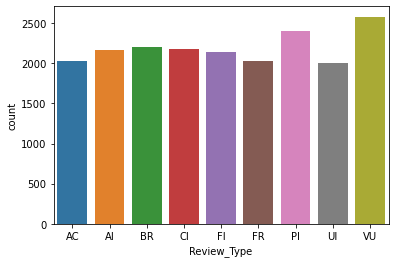

In [44]:
import seaborn as sns

sns.countplot(x='Review_Type', data=df)